In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/ML/AGAexons_features.csv", sep=",")

In [2]:
#'included' yes no becomes classifier
# Map 'yes' -> 1 and 'no' -> 0
df['induced_encoded'] = df['induced'].map({'yes': 1, 'no': 0})

df.head()

,HbondBulgeGA,induced,PSI,UP50,DOWN50,SF2/ASF_count,SF2/ASF_max_score,SF2/ASF_mean_score,SF2/ASF_IgM_BRCA1_count,SF2/ASF_IgM_BRCA1_max_score,...,SRp55_count,SRp55_max_score,SRp55_mean_score,FAS_hex2_count,FAS_hex2_density,FAS_hex3_count,FAS_hex3_density,log2_FPKM,U1bindingsite,induced_encoded
0,19,no,0.000000,GAUCUGAAAUGAAGACUGAUAAGACAUUCUUGAACUUUUUGAGCUUCCA,ACCCUAGCUGUGCCAGCACAUGUUCAUCUUUACAAUUUAUAUUGUA...,0,0.98,-3.598298,0,1.06,...,0,2.21,-2.191458,0.0,0.000000,0.0,0.000000,1.632450,AAGAGUAUGUAA,0
1,22,no,100.000000,CCCGAUUUGGUGCUUGGAUGACAGACCCUUUAGCAUCUGAGAAAAACAA,CUCCCACAAACACCUUUGCUUAGAAUUAAGUUCUGCUUACACUUUU...,1,2.04,-3.022553,2,2.61,...,1,3.65,-2.160833,0.0,0.000000,0.0,0.000000,2.363028,CAGAGUAUGUUU,0
2,21,no,100.000000,GGUGCCAGGGCACUUCAGGUGGCGAUGGCCCUCCUGGCCCUCCAGGUGA,GAUACAGCCACAUAAUAUAAAAUGAAAAUUAGUAUUUCUGCAAGUA...,1,2.09,-1.974255,2,2.33,...,0,2.40,-2.187083,2.0,0.037736,1.0,0.018868,1.005384,AAGAGUACGUAU,0
3,26,no,100.000000,GUGAAGAUGGUUUUCCAGGAUUCAAAGGUGACAUGGGUCUAAAAGGUGA,AGAGAAAAUGUACACCAGUACACAAAAUUUAAUAUAUAUAUAUAUU...,1,3.32,-2.988723,1,3.21,...,1,3.08,-2.258958,2.0,0.037736,1.0,0.018868,1.005384,CAGAGUAAGUAU,0
4,20,no,99.408284,AAGUAUGACCUCCUGGUUUGGUUUGAGAUCAGUGAACUGGAGCCUACAG,AACUUAAUAAAUUUUUAAAUAAGGCAAAAUGUUUCAAAUUAGGAAA...,1,3.03,-2.975319,2,2.33,...,0,2.34,-2.249583,4.0,0.075472,4.0,0.075472,3.420205,GAGAGUAAGUCC,0


In [3]:
#one hot encoding
import numpy as np
import torch
rna_vocab = ['A', 'C', 'G', 'U']
nt_to_onehot = {nt: np.eye(len(rna_vocab))[i] for i, nt in enumerate(rna_vocab)}

def onehot_flat(seq):
    return torch.tensor(np.vstack([nt_to_onehot[nt] for nt in seq]).flatten(), dtype=torch.float)

# Replace your encoded columns
df['onehot_UP50'] = df['UP50'].apply(onehot_flat)
df['onehot_DOWN50'] = df['DOWN50'].apply(onehot_flat)
df['onehot_U1bindingsite'] = df['U1bindingsite'].apply(onehot_flat)

pd.reset_option("display.max_colwidth")

df.head()

,HbondBulgeGA,induced,PSI,UP50,DOWN50,SF2/ASF_count,SF2/ASF_max_score,SF2/ASF_mean_score,SF2/ASF_IgM_BRCA1_count,SF2/ASF_IgM_BRCA1_max_score,...,FAS_hex2_count,FAS_hex2_density,FAS_hex3_count,FAS_hex3_density,log2_FPKM,U1bindingsite,induced_encoded,onehot_UP50,onehot_DOWN50,onehot_U1bindingsite
0,19,no,0.000000,GAUCUGAAAUGAAGACUGAUAAGACAUUCUUGAACUUUUUGAGCUUCCA,ACCCUAGCUGUGCCAGCACAUGUUCAUCUUUACAAUUUAUAUUGUA...,0,0.98,-3.598298,0,1.06,...,0.0,0.000000,0.0,0.000000,1.632450,AAGAGUAUGUAA,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0...."
1,22,no,100.000000,CCCGAUUUGGUGCUUGGAUGACAGACCCUUUAGCAUCUGAGAAAAACAA,CUCCCACAAACACCUUUGCUUAGAAUUAAGUUCUGCUUACACUUUU...,1,2.04,-3.022553,2,2.61,...,0.0,0.000000,0.0,0.000000,2.363028,CAGAGUAUGUUU,0,"[tensor(0.), tensor(1.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
2,21,no,100.000000,GGUGCCAGGGCACUUCAGGUGGCGAUGGCCCUCCUGGCCCUCCAGGUGA,GAUACAGCCACAUAAUAUAAAAUGAAAAUUAGUAUUUCUGCAAGUA...,1,2.09,-1.974255,2,2.33,...,2.0,0.037736,1.0,0.018868,1.005384,AAGAGUACGUAU,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0...."
3,26,no,100.000000,GUGAAGAUGGUUUUCCAGGAUUCAAAGGUGACAUGGGUCUAAAAGGUGA,AGAGAAAAUGUACACCAGUACACAAAAUUUAAUAUAUAUAUAUAUU...,1,3.32,-2.988723,1,3.21,...,2.0,0.037736,1.0,0.018868,1.005384,CAGAGUAAGUAU,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
4,20,no,99.408284,AAGUAUGACCUCCUGGUUUGGUUUGAGAUCAGUGAACUGGAGCCUACAG,AACUUAAUAAAUUUUUAAAUAAGGCAAAAUGUUUCAAAUUAGGAAA...,1,3.03,-2.975319,2,2.33,...,4.0,0.075472,4.0,0.075472,3.420205,GAGAGUAAGUCC,0,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(1.), tensor(0...."


Evaluating U1 binding site...
Evaluating sequence (+-50nt)...


/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-pac

Evaluating complementarity...
Evaluating enhancer/silencer...


/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-pac

Evaluating Expression...
Evaluating PSI...
Evaluating best parameters on custom feature set...


/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:47:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1758007966380/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lenkefe1/.conda/envs/rnafold/lib/python3.10/site-pac

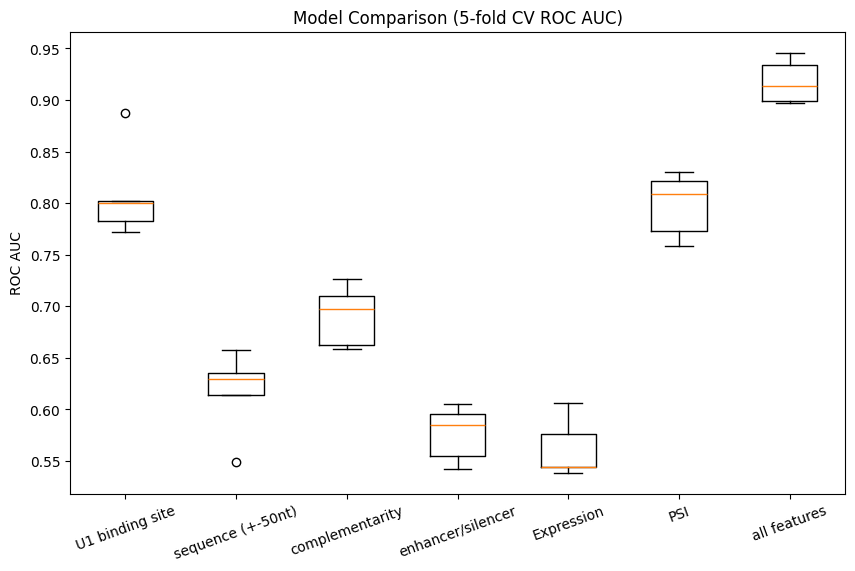

U1 binding site: mean=0.809, std=0.041, scores=[0.7828349282296649, 0.8003299033854372, 0.7723894017503895, 0.8023818087359629, 0.8869839747432362]
sequence (+-50nt): mean=0.617, std=0.037, scores=[0.6291068580542264, 0.6142879585264316, 0.6573152699516445, 0.548495384246493, 0.6350157854773608]
complementarity: mean=0.691, std=0.027, scores=[0.658133971291866, 0.7095868352839526, 0.6973584302441754, 0.6626703432841786, 0.7262718299164768]
enhancer/silencer: mean=0.577, std=0.024, scores=[0.5848484848484848, 0.5421019558557851, 0.5550893178275986, 0.6054429924469488, 0.5956919633936778]
Expression: mean=0.562, std=0.026, scores=[0.5435805422647527, 0.5763490692011626, 0.6062022938896215, 0.5385845022579225, 0.5439195939735444]
PSI: mean=0.798, std=0.028, scores=[0.8216108452950557, 0.7727594061739063, 0.8083962754266074, 0.8302961275626424, 0.7583223434440315]
all features: mean=0.918, std=0.019, scores=[0.8992424242424242, 0.9134003613227555, 0.897454342005355, 0.9340207009551212, 0.9

In [5]:
#run XGboost with different features provided and compare ROC AUC (5x cross validated)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

#flatten row
def flatten_row(row, feature_columns):
    features = []
    for col in feature_columns:
        val = row[col]
        if isinstance(val, list):
            for x in val:
                if hasattr(x, "item"):  # PyTorch tensor
                    features.append(x.item())
                else:
                    features.append(float(x))
        elif hasattr(val, "numpy"):  # numpy array or torch tensor
            if hasattr(val, "shape") and len(val.shape) > 0:  
                features.extend(val.cpu().numpy().ravel())  
            else:
                features.append(float(val))
        elif hasattr(val, "item"):  
            features.append(val.item())
        else:
            features.append(float(val))
    return features

#run 5-fold CV to get mean ROC scores
def evaluate_model(df, feature_columns, y_col="induced_encoded", params=None):
    X = np.stack(df.apply(lambda row: flatten_row(row, feature_columns), axis=1).values)
    y = df[y_col].values

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_scores = []

    if params is None:
        clf_cv = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            eval_metric='logloss',
            use_label_encoder=False,
            random_state=42
        )
    else:
        clf_cv = XGBClassifier(
            eval_metric='logloss',
            use_label_encoder=False,
            random_state=42,
            **params
        )

    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf_cv.fit(X_train, y_train)
        y_pred_proba = clf_cv.predict_proba(X_val)[:, 1]
        roc = roc_auc_score(y_val, y_pred_proba)
        roc_scores.append(roc)

    return roc_scores

# Define feature sets for models
models = {
    "U1 binding site": ["onehot_U1bindingsite"], 
    "sequence (+-50nt)": ["onehot_UP50", "onehot_DOWN50"], 
    "complementarity": ['HbondBulgeGA'],
    "enhancer/silencer": ['SF2/ASF_count', 'SF2/ASF_max_score', 'SF2/ASF_mean_score', 'SF2/ASF_IgM_BRCA1_count', 'SF2/ASF_IgM_BRCA1_max_score', 
                       'SF2/ASF_IgM_BRCA1_mean_score', 'SC35_count', 'SC35_max_score', 'SC35_mean_score', 
                        'SRp40_count', 'SRp40_max_score', 'SRp40_mean_score', 
                        'SRp55_count', 'SRp55_max_score', 'SRp55_mean_score', 'FAS_hex2_count', 'FAS_hex2_density', 'FAS_hex3_count', 'FAS_hex3_density'],
    "Expression": ['log2_FPKM'],
    "PSI": ['PSI']
}

best_params_model = {
    'subsample': 0.7,
    'reg_lambda': 1.5,
    'reg_alpha': 0,
    'n_estimators': 200,
    'max_depth': 6,
    'learning_rate': 0.01,
    'gamma': 0.2,
    'colsample_bytree': 0.7,
    'scale_pos_weight': 2196 / 286  # balance classes
}
#3943 309
#3130

# --- Run evaluation ---
results = {}
for model_name, features in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(df, features)

# Add Model with all features (best performance)

best_feature_set = [ "onehot_U1bindingsite", "onehot_UP50", "onehot_DOWN50",'HbondBulgeGA',
                    'SF2/ASF_count', 'SF2/ASF_max_score', 'SF2/ASF_mean_score', 'SF2/ASF_IgM_BRCA1_count', 'SF2/ASF_IgM_BRCA1_max_score', 'SF2/ASF_IgM_BRCA1_mean_score', 'SC35_count', 
                    'SC35_max_score', 'SC35_mean_score', 'SRp40_count', 'SRp40_max_score', 'SRp40_mean_score', 'SRp55_count', 'SRp55_max_score', 'SRp55_mean_score', 
                    'FAS_hex2_count', 'FAS_hex2_density', 'FAS_hex3_count', 'FAS_hex3_density',
                     'log2_FPKM', 'PSI' ]

print("Evaluating best parameters on custom feature set...")
results["all features"] = evaluate_model( df, best_feature_set, params=best_params_model )

# --- Boxplot comparison ---
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.ylabel("ROC AUC")
plt.title("Model Comparison (5-fold CV ROC AUC)")
plt.xticks(rotation=20)
plt.show()

# Print mean/std for each model
for model, scores in results.items():
    print(f"{model}: mean={np.mean(scores):.3f}, std={np.std(scores):.3f}, scores={scores}")